<a href="https://colab.research.google.com/github/yeyni2/Dog-detection-model/blob/main/Sofy_Identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

לירן ייני - הפרויקט שלי מנסה לזהות האם סופי נמצאת בתמונה או לא.

התמונות הם תמונות מקוריות מהטלפון שלי

תחילה נתחבר ל drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


נייבא את הספריותר הנדרשות

In [ ]:
import pandas as pd
import numpy as np
import os
import glob
import tensorflow as tf
import cv2
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline  
import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Dropout, Flatten, Activation, RandomFlip, RandomRotation, Resizing, Rescaling, experimental
from keras.layers import concatenate, Lambda, Embedding, Input
import random
import cv2
#import tensorflow_addons as tfa
#import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing import image_dataset_from_directory 

In [ ]:
datatraindir = "/content/drive/MyDrive/data_train"
datavaldir = "/content/drive/MyDrive/data_val"

עכשיו נבנה נחלק את התמונות לאימון ובוחן

In [ ]:
train_ds = image_dataset_from_directory(
    directory = "/content/drive/MyDrive/data_train",
    labels = 'inferred',
    batch_size = 32,
    image_size = (256,256))
val_ds = image_dataset_from_directory(
    directory = '/content/drive/MyDrive/data_val',
    labels = 'inferred',
    batch_size = 32,
    image_size = (256,256))

Found 221 files belonging to 2 classes.
Found 56 files belonging to 2 classes.


In [ ]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

מפני שאין מספר רב של תמונות נרצה לשנות כל אחת קצת ועל ידי כך להגדיל את מספר התמונות שברשותנו.

In [ ]:
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
    [
     layers.RandomFlip("horizontal"),
     layers.RandomZoom(0.2),
     layers.RandomRotation(0.1)
    ]
)


נראה איך פועל הaugmentation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


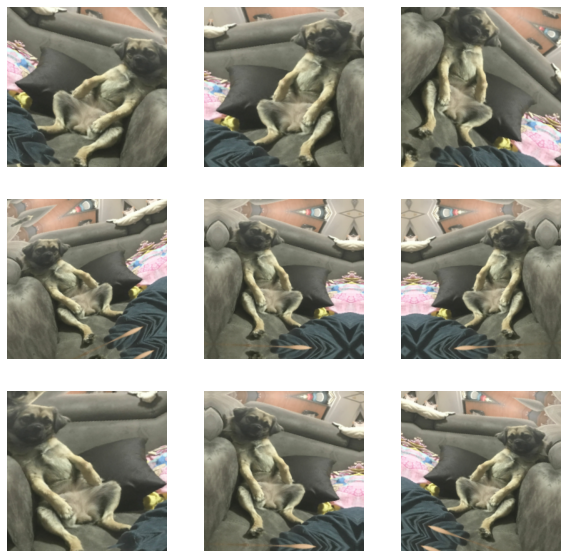

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds:
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

נדפיס כמה תמונות מן הנתונים

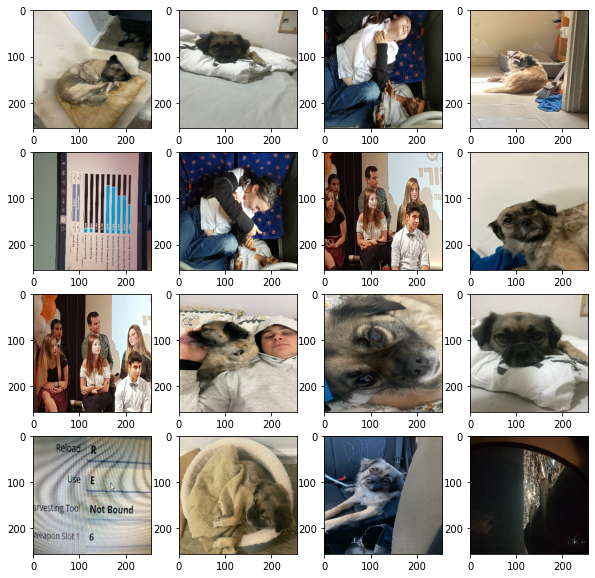

In [ ]:
plt.figure(figsize=(10, 10))
class_names = train_ds.class_names
for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        #plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
# img_folder_sofy = "/content/drive/MyDrive/data_train/sofypic"
# plt.figure(figsize=(20,20))
# print("It is Sofy!!!")
# for i in range(5):
#     file = random.choice(os.listdir(img_folder_sofy))
#     image_path= os.path.join(img_folder_sofy, file)
#     img=mpimg.imread(image_path)
#     ax=plt.subplot(1,5,i+1)
#     ax.title.set_text(file)
#     plt.imshow(img)
  


In [ ]:
# img_folder_notsofy = "/content/drive/MyDrive/data_train/notsofy"
# print("Well it is a random thing, but its not Sofy")
# plt.figure(figsize=(20,20))
# for i in range(5):
#     file = random.choice(os.listdir(img_folder_notsofy))
#     image_path= os.path.join(img_folder_notsofy, file)
#     img=mpimg.imread(image_path)
#     ax=plt.subplot(1,5,i+1)
#     ax.title.set_text(file)
#     plt.imshow(img)

נבנה את המודל שלנו על פי אינטואיצה

In [ ]:
from tensorflow.keras import layers, regularizers
def make_model(input_shape, num_classes):
   inputs = keras.Input(shape = input_shape)
   x = data_augmentation(inputs)
   x = layers.Rescaling(1.0/255)(x)

   x = layers.Conv2D(64, 3,strides = 1, padding = 'same')(x)
   x = layers.Conv2D(64, 3,strides = 1, padding = 'same')(x)
   x = layers.MaxPooling2D()(x)
   x = layers.BatchNormalization()(x)
   x = layers.Dropout(0.2)(x)
   

   x = layers.Conv2D(128, 3,strides = 1, padding = 'same')(x)
   x = layers.Conv2D(128, 3,strides = 1, padding = 'same')(x)
   x = layers.MaxPooling2D()(x)
   x = layers.BatchNormalization()(x)
   x = layers.Dropout(0.2)(x)

   x = layers.Conv2D(256, 3,strides = 1, padding = 'same')(x)
   x = layers.Conv2D(256, 3,strides = 1, padding = 'same')(x)
   x = layers.MaxPooling2D()(x)
   x = layers.BatchNormalization()(x)
   x = layers.Dropout(0.2)(x)

   x = layers.Conv2D(512, 3,strides = 1, padding = 'same')(x)
   x = layers.Conv2D(512, 3,strides = 1, padding = 'same')(x)
   x = layers.BatchNormalization()(x)
   x = layers.MaxPooling2D()(x)
   

   x = layers.Conv2D(512, 3,strides = 1, padding = 'same')(x)
   x = layers.Conv2D(512, 3,strides = 1, padding = 'same')(x)
   x = layers.MaxPooling2D()(x)
   x = layers.BatchNormalization()(x)
   x = layers.Dropout(0.2)(x)
 
   x = layers.Dense(4096, activation='sigmoid')(x)
   x = layers.Dense(1000, activation='sigmoid')(x)
   x = layers.Dropout(0.2)(x)
   x = Flatten()(x)
   #x = layers.GlobalAveragePooling2D()(x)
   outputs = layers.Dense(1, activation='sigmoid')(x)
   return keras.Model(inputs, outputs)


ניתן לראות כי המודל יחסית גדול ויש לו 15 מיליון פרמטרים

In [ ]:
model = make_model((256, 256, 3), 2)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                             

נאמן את המודל ל 20 אפוקים

In [ ]:
model.compile(loss = "binary_crossentropy",  optimizer = tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [ ]:
history = model.fit(train_ds, epochs = 20, validation_data = val_ds)

Epoch 1/20
7/7 [==============================] - 47s 4s/step - loss: 5.3583 - accuracy: 0.5249 - val_loss: 0.9014 - val_accuracy: 0.5179
Epoch 2/20
7/7 [==============================] - 6s 372ms/step - loss: 0.7093 - accuracy: 0.4570 - val_loss: 0.7367 - val_accuracy: 0.4821
Epoch 3/20
7/7 [==============================] - 7s 448ms/step - loss: 0.6987 - accuracy: 0.4751 - val_loss: 0.7213 - val_accuracy: 0.4821
Epoch 4/20
7/7 [==============================] - 7s 408ms/step - loss: 0.6897 - accuracy: 0.5339 - val_loss: 0.6998 - val_accuracy: 0.4643
Epoch 5/20
7/7 [==============================] - 7s 371ms/step - loss: 0.6783 - accuracy: 0.6561 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 6/20
7/7 [==============================] - 7s 371ms/step - loss: 0.6630 - accuracy: 0.6561 - val_loss: 0.6635 - val_accuracy: 0.8571
Epoch 7/20
7/7 [==============================] - 6s 370ms/step - loss: 0.6306 - accuracy: 0.7557 - val_loss: 0.6904 - val_accuracy: 0.5536
Epoch 8/20
7/7 [======

ניתן לראות כי המודל הגיע לדיוק נמוך של 46% אך הדבר לא מפתיע בהתחשב בכמות הנמוכה של התמונות שעליהם אימנו את המול

עכשיו נשתמש ברשת מואומנת מראש ונקפיא את השכבות שלה בשביל להביא לה את המשקלים שלנו

In [ ]:
base_model = tf.keras.applications.Xception(weights="imagenet", input_shape=(256,256,3),include_top=False)
base_model.trainable = False

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.python.ops.gen_dataset_ops import optional_get_value
from tensorflow.python import training
inputs = keras.Input(shape = (256,256,3))
x = data_augmentation(inputs)
x = base_model(inputs)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1, activation = 'sigmoid')(x)
model2 = keras.Model(inputs, outputs)


In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model2, 'model.png', show_shapes=True)
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_3 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 20,863,529
Trainable params: 2,049
Non-trainable params: 20,861,480
_________________________________________________________________


נאמן את המודל

In [ ]:
model2.compile(loss = "binary_crossentropy",  optimizer = tf.keras.optimizers.Adam(1e-3), metrics = ["accuracy"])
model2.fit(train_ds, epochs = 20, validation_data = val_ds)

Epoch 1/20
7/7 [==============================] - 10s 446ms/step - loss: 2.6848 - accuracy: 0.5792 - val_loss: 1.8423 - val_accuracy: 0.6607
Epoch 2/20
7/7 [==============================] - 6s 241ms/step - loss: 2.1837 - accuracy: 0.6380 - val_loss: 3.7518 - val_accuracy: 0.6250
Epoch 3/20
7/7 [==============================] - 6s 242ms/step - loss: 1.1480 - accuracy: 0.7195 - val_loss: 1.6079 - val_accuracy: 0.7321
Epoch 4/20
7/7 [==============================] - 6s 240ms/step - loss: 0.9142 - accuracy: 0.7557 - val_loss: 2.6783 - val_accuracy: 0.6964
Epoch 5/20
7/7 [==============================] - 6s 243ms/step - loss: 0.6951 - accuracy: 0.7692 - val_loss: 1.6382 - val_accuracy: 0.6964
Epoch 6/20
7/7 [==============================] - 6s 240ms/step - loss: 0.5141 - accuracy: 0.8462 - val_loss: 2.0092 - val_accuracy: 0.7500
Epoch 7/20
7/7 [==============================] - 6s 247ms/step - loss: 0.4125 - accuracy: 0.8688 - val_loss: 1.7425 - val_accuracy: 0.6964
Epoch 8/20
7/7 [===

ניתן לראות כי המודל הזה הגיע לביצועים הרבה יותר טובים ממה הנבנה על ידינו

עכשיו נבטל את ההקפאה ונאמן את המודל

In [ ]:
base_model.trainable = True
model2.summary()
model2.compile(loss = "binary_crossentropy",  optimizer = tf.keras.optimizers.Adam(1e-5), metrics = [keras.metrics.BinaryAccuracy()])
model2.fit(train_ds, epochs = 15,validation_data = val_ds)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_3 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 20,863,529
Trainable params: 20,809,001
Non-trainable params: 54,528
_________________________________________________________________
Epoch 1/15
7/7 [==============================] - 14s 822ms/step - loss: 0.8174 - binary_accuracy: 0.4706 - 

נראה כי המודל הגיע לאחוזים גבוהים של דיוק

In [ ]:
score = model.evaluate(val_ds, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.7201487421989441
Test accuracy: 0.7678571343421936


עכשיו ננסה את המודל על תמונות שלנו

In [ ]:
from keras.preprocessing.image import load_img, img_to_array

In [ ]:
  my_images = []
  predictions = []
  my_images.append(load_img('/content/drive/MyDrive/predict_sophie/WhatsApp_Image_2022-01-03_at_21.58.53[1].jpeg',target_size = (256, 256)))
  my_images.append(load_img('/content/drive/MyDrive/predict_sophie/WhatsApp_Image_2022-01-03_at_21.58.53_(1)[1].jpeg',target_size = (256, 256)))
  my_images.append(load_img('/content/drive/MyDrive/predict_sophie/WhatsApp_Image_2022-01-03_at_21.58.54[1].jpeg',target_size = (256, 256)))
  my_images.append(load_img('/content/drive/MyDrive/predict_sophie/WhatsApp_Image_2022-01-03_at_21.58.54_(1)[1].jpeg',target_size = (256, 256)))
  my_images.append(load_img('/content/drive/MyDrive/predict_sophie/WhatsApp_Image_2022-01-03_at_21.58.55[1].jpeg',target_size = (256, 256)))
  my_images.append(load_img('/content/drive/MyDrive/predict_sophie/WhatsApp_Image_2022-01-03_at_21.58.55_(1)[1].jpeg',target_size = (256, 256)))
  for i in range(6):
    img_array = keras.preprocessing.image.img_to_array(my_images[i])
    img_array = tf.expand_dims(img_array, 0)
    print(img_array.shape)
    score = model2.predict(img_array)[0]
    predictions.append("sophie" if score > 0.5 else "not sophie")

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


In [ ]:
score = model2.evaluate(val_ds, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0880587249994278
Test accuracy: 0.9821428656578064


כמו שניתן לראות המודל בקלות מזהה מתי זאת לא סופי והתסלסל פעם אחד גאשר התמונה היתה עם הגב שלה (תמונה קשה בהרבה)

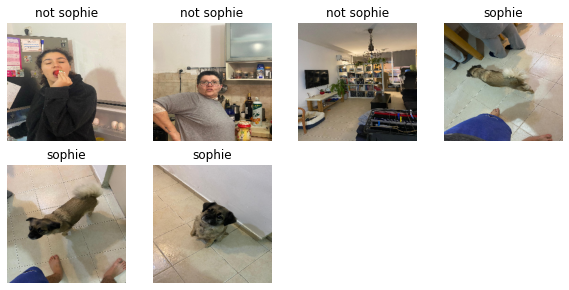

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(6):
  ax = plt.subplot(4, 4, i + 1)
  plt.imshow(my_images[i])
  plt.title(predictions[i])
  plt.axis("off")